In [8]:
# Importing libraries

import pandas as pd
import numpy as np
from numpy import log2
import matplotlib.pyplot as plt


In [2]:
# Importing parameters for the toggle tetrahedron model from the parameters file generated by RACIPE

pdf = pd.read_csv("TTr_parameters.dat", delim_whitespace=True, names=['S_no', 'states', 'g_A', 'g_B', 'g_C', 'g_D', 'k_A', 'k_B', 'k_C', 'k_D', 'x_B_A', 'n_B_A', 'l_B_A', 'x_D_A', 'n_D_A', 'l_D_A', 'x_C_A', 'n_C_A', 'l_C_A', 'x_A_B', 'n_A_B', 'l_A_B', 'x_C_B', 'n_C_B', 'l_C_B', 'x_D_B', 'n_D_B', 'l_D_B', 'x_B_C', 'n_B_C', 'l_B_C', 'x_D_C', 'n_D_C', 'l_D_C', 'x_A_C', 'n_A_C', 'l_A_C', 'x_C_D', 'n_C_D', 'l_C_D', 'x_A_D', 'n_A_D', 'l_A_D', 'l_B_D', 'x_B_D', 'n_B_D'])
Pars = pdf.to_dict('records')[40]

# Uncomment the following lines to manually enter the parameters:

# Pars = {'S_no': 41, 'states': 2, 
#         'g_A': 88.349694, 'g_B': 12.850738, 'g_C': 83.343693, 'g_D': 59.029432, 
#         'k_A': 0.634847, 'k_B': 0.935456, 'k_C': 0.149318, 'k_D': 0.547541, 
#         'x_B_A': 0.561687, 'n_B_A': 9.0, 'l_B_A': 0.045112, 
#         'x_D_A': 1.238266, 'n_D_A': 10.0, 'l_D_A': 0.014848, 
#         'x_C_A': 0.460634, 'n_C_A': 8.0, 'l_C_A': 0.012711, 
#         'x_A_B': 0.807073, 'n_A_B': 6.0, 'l_A_B': 0.015128, 
#         'x_C_B': 1.176384, 'n_C_B': 8.0, 'l_C_B': 0.018616, 
#         'x_D_B': 1.197542, 'n_D_B': 10.0, 'l_D_B': 0.029144, 
#         'x_B_C': 1.224077, 'n_B_C': 7.0, 'l_B_C': 0.016709, 
#         'x_D_C': 0.786614, 'n_D_C': 10.0, 'l_D_C': 0.018815, 
#         'x_A_C': 0.769146, 'n_A_C': 7.0, 'l_A_C': 0.021208, 
#         'x_C_D': 0.830667, 'n_C_D': 9.0, 'l_C_D': 0.010854, 
#         'x_A_D': 0.383212, 'n_A_D': 9.0, 'l_A_D': 0.03546, 
#         'l_B_D': 1.216101, 'x_B_D': 7.0, 'n_B_D': 0.011969}

print(Pars)

{'S_no': 41, 'states': 2, 'g_A': 88.349694, 'g_B': 12.850738, 'g_C': 83.343693, 'g_D': 59.029432, 'k_A': 0.634847, 'k_B': 0.935456, 'k_C': 0.149318, 'k_D': 0.547541, 'x_B_A': 0.561687, 'n_B_A': 9.0, 'l_B_A': 0.045112, 'x_D_A': 1.238266, 'n_D_A': 10.0, 'l_D_A': 0.014848, 'x_C_A': 0.460634, 'n_C_A': 8.0, 'l_C_A': 0.012711, 'x_A_B': 0.807073, 'n_A_B': 6.0, 'l_A_B': 0.015128, 'x_C_B': 1.176384, 'n_C_B': 8.0, 'l_C_B': 0.018616, 'x_D_B': 1.197542, 'n_D_B': 10.0, 'l_D_B': 0.029144, 'x_B_C': 1.224077, 'n_B_C': 7.0, 'l_B_C': 0.016709, 'x_D_C': 0.786614, 'n_D_C': 10.0, 'l_D_C': 0.018815, 'x_A_C': 0.769146, 'n_A_C': 7.0, 'l_A_C': 0.021208, 'x_C_D': 0.830667, 'n_C_D': 9.0, 'l_C_D': 0.010854, 'x_A_D': 0.383212, 'n_A_D': 9.0, 'l_A_D': 0.03546, 'l_B_D': 1.216101, 'x_B_D': 7.0, 'n_B_D': 0.011969}


In [6]:
# Defining the model.
# Vars is a dictionary of the concentrations in the model defined later.

def Hm(p: str, q: str) -> float:
    """Inhibitory Hill function for p inhibiting q"""
    z = Vars[p]
    trd = Pars[f'x_{p}_{q}']
    num = Pars[f'n_{p}_{q}']
    ans = 1/(1+((z/trd)**num))
    return ans


def Hs(p: str, q: str) -> float:
    """Non-linear shifted Hill function for p inhibiting q"""
    fld = Pars[f'l_{p}_{q}']
    ans = fld + ((1-fld)*Hm(p, q))
    return ans


def inh(a: str, b: str, c: str, x:str) -> float:
    """Differential equation for x being inhibitted by a, b and c"""
    z = Vars[x]
    prod = Pars[f'g_{x}']
    deg = Pars[f'k_{x}']
    return prod*Hs(a, x)*Hs(b, x)*Hs(c, x) - deg*z


def EulerIter(step):
    """Euler's method for solving the differential equations with added noise"""
    Vars['A'] += step*inh('B', 'C', 'D', 'A') + np.random.normal(0, 1)*np.sqrt(step)*noise*Vars['A']
    Vars['B'] += step*inh('A', 'C', 'D', 'B') + np.random.normal(0, 1)*np.sqrt(step)*noise*Vars['B']
    Vars['C'] += step*inh('A', 'B', 'D', 'C') + np.random.normal(0, 1)*np.sqrt(step)*noise*Vars['C']
    Vars['D'] += step*inh('A', 'B', 'C', 'D') + np.random.normal(0, 1)*np.sqrt(step)*noise*Vars['D']
    Vars['t'] += step

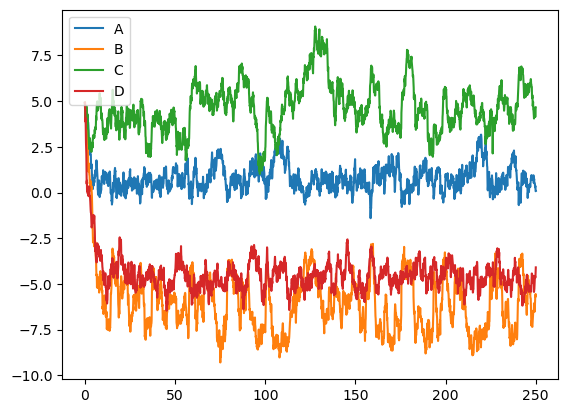

In [7]:
# Initial state of the system (concentrations and time)
Vars = {'A': 30,
        'B': 30,
        'C': 30,
        'D': 30,
        't': 0}

noise = 0.5         # Noise strength
T = 250             # Total time for simulation
step = 0.1          # Step size for integration

# Performing the Stochastic Simulation 
data = np.zeros((int(T/step) + 1, 5))
data[0] = [Vars['t'], Vars['A'], Vars['B'], Vars['C'], Vars['D']]
for i in range(len(data)-1):
    EulerIter(step)
    data[i+1] = [Vars['t'], Vars['A'], Vars['B'], Vars['C'], Vars['D']]


# Plotting the log2 of the concentrations
plt.plot(data[:,0], (log2(data[:,1])), label='A')
plt.plot(data[:,0], (log2(data[:,2])), label='B')
plt.plot(data[:,0], (log2(data[:,3])), label='C')
plt.plot(data[:,0], (log2(data[:,4])), label='D')
plt.legend()
plt.show()

    